<a href="https://colab.research.google.com/github/JulenUR/Actividad-4-Extraccion-de-caracteriticas-/blob/main/A01735646_4_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [145]:
#Importamos librerías requeridas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [113]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (1).xlsx


{'microretailer_mit_lift_lab (1).xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

## LIMPIEZA DEL ARCHIVO DE VALORES NULOS Y OUTLIERS

In [146]:
#carga desde un archivo .xlsx sin indices
Micro_Retailer = pd.read_excel('microretailer_mit_lift_lab.xlsx')

In [147]:
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [148]:
#ajustar maximo de columnas
pd.options.display.max_columns= None

In [149]:
#Imprimo los primeros 5 registros
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

In [150]:
# Seleccionar variables categóricas
categor = Micro_Retailer.select_dtypes(include=['object'])
categor

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),NaN,yes,yes,2012-08-12,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,NaN,no,no,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,Aplicación móvil,no,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria,no,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka.

In [151]:
categor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

In [152]:
categor

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,19_tax_id,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,35_interest_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,yes,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),NaN,yes,yes,2012-08-12,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,NaN,no,no,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,Aplicación móvil,no,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Transferencia interbancaria,no,NaN,NaN,"Categoría (e.g. limpieza, aseo personal, comes...","Ofrecer un producto sustituto,Solicitar tiempo...",10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka.

In [154]:
#Filtro de las 20 columnas por categoricas cualitativas y categoricas cuantitativas
cuantitativas = Micro_Retailer.iloc[ :,[6,16,78]]
cualitativas = Micro_Retailer.iloc[ :,[3,5,7,9,11,15,16,18,32,36,47,48,53,86,91,96]]

In [155]:
#Corroboramos valores nulos
valores_nulos = cuantitativas.isnull().sum()
valores_nulos

_longitude                                            0
104_how_many_shelves_does_the_micro_retailer_have     0
172_supplier_frequency                               99
dtype: int64

In [156]:
cuantitativas = cuantitativas.fillna(method='ffill')

<ipython-input-156-1342055668dd>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cuantitativas = cuantitativas.fillna(method='ffill')


In [157]:
#Corroboramos valores nulos
valores_nulos = cuantitativas.isnull().sum()
valores_nulos

_longitude                                            0
104_how_many_shelves_does_the_micro_retailer_have     0
172_supplier_frequency                               10
dtype: int64

In [158]:
y = cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido: \n", Limite_Superior)
print("Limite inferior permitido: \n", Limite_Inferior)

Limite superior permitido: 
 _longitude                                          -98.090304
104_how_many_shelves_does_the_micro_retailer_have    55.812917
172_supplier_frequency                               10.300210
dtype: float64
Limite inferior permitido: 
 _longitude                                          -98.347635
104_how_many_shelves_does_the_micro_retailer_have   -42.397712
172_supplier_frequency                               -4.175986
dtype: float64


In [159]:
#Encontramos Outliers del data frame
outliers = cuantitativas[(y>Limite_Superior) | (y<Limite_Inferior)]
outliers

,_longitude,104_how_many_shelves_does_the_micro_retailer_have,172_supplier_frequency
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
166,NaN,NaN,NaN
167,NaN,NaN,NaN
168,NaN,NaN,NaN
169,NaN,NaN,NaN


In [160]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
cuantitativas = cuantitativas[(y<=Limite_Superior) & (y>=Limite_Inferior)]
cuantitativas

,_longitude,104_how_many_shelves_does_the_micro_retailer_have,172_supplier_frequency
0,-98.233822,4.0,NaN
1,-98.234142,8.0,NaN
2,-98.232300,24.0,NaN
3,-98.233158,2.0,NaN
4,-98.233864,16.0,NaN
...,...,...,...
166,-98.194066,5.0,5.0
167,-98.193802,5.0,5.0
168,-98.193439,1.0,5.0
169,-98.193818,1.0,5.0


In [161]:
#Corroboramos valores nulos
valores_nulos = cuantitativas.isnull().sum()
valores_nulos

_longitude                                            0
104_how_many_shelves_does_the_micro_retailer_have     3
172_supplier_frequency                               10
dtype: int64

In [162]:
#Reemplazamos valores atípicos (nulos) del data frame con "mean"
dataclean_cuantitativas = cuantitativas.copy()
dataclean_cuantitativas = dataclean_cuantitativas.fillna(round(cuantitativas.mean(), 1))
dataclean_cuantitativas

,_longitude,104_how_many_shelves_does_the_micro_retailer_have,172_supplier_frequency
0,-98.233822,4.0,3.1
1,-98.234142,8.0,3.1
2,-98.232300,24.0,3.1
3,-98.233158,2.0,3.1
4,-98.233864,16.0,3.1
...,...,...,...
166,-98.194066,5.0,5.0
167,-98.193802,5.0,5.0
168,-98.193439,1.0,5.0
169,-98.193818,1.0,5.0


In [163]:
#Corroboramos valores nulos
valores_nulos = dataclean_cuantitativas.isnull().sum()
valores_nulos

_longitude                                           0
104_how_many_shelves_does_the_micro_retailer_have    0
172_supplier_frequency                               0
dtype: int64

In [164]:
#Corroboramos valores nulos
valores_nulos = cualitativas.isnull().sum()
valores_nulos

_updated_by                                                     0
_latitude                                                       0
228_store_name                                                  0
232_type_of_store                                               0
99_does_the_micro_retailer_exhibits_products_outside_           0
184_store_devices                                               2
104_how_many_shelves_does_the_micro_retailer_have               0
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz      0
310_burnout                                                    64
189_payment_methods                                            64
214_customer_relationship_tools                                76
33_credit_to_customers                                         64
193_sales_planning_tools                                       89
157_frequency_organize_shelves                                 75
249_technology_training                                        98
261_techno

In [165]:
dataclean_cualitativas = cualitativas.copy()
dataclean_cualitativas = dataclean_cualitativas.fillna('X')
dataclean_cualitativas

,_updated_by,_latitude,228_store_name,232_type_of_store,99_does_the_micro_retailer_exhibits_products_outside_,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,310_burnout,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,193_sales_planning_tools,157_frequency_organize_shelves,249_technology_training,261_technology_organization
0,Salomon Abdala Perez,19.053536,Eugene’s Compostura,Tailor,no,POS system (i.e. computer + bar code scanner +...,4,yes,no,"Efectivo,Transferencia interbancaria",Redes sociales,no,Software especializado,Semestralmente,X,X
1,Salomon Abdala Perez,19.053561,Frutas y verduras Angy,Grocery store (aka. nanostore),yes,Dataphone (i.e. card payments),8,yes,no,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,X,X,X,X
2,Salomon Abdala Perez,19.058655,Libélula,Grocery store (aka. nanostore),no,"Dataphone (i.e. card payments),POS system (i.e...",24,yes,no,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,X,Semanalmente,X,X
3,Salomon Abdala Perez,19.059293,Quality fix,Grocery store (aka. nanostore),no,POS system (i.e. computer + bar code scanner +...,2,yes,no,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,Ninguna,Semanalmente,X,X
4,Salomon Abdala Perez,19.059585,Artesanías Los Pinos,Grocery store (aka. nanostore),no,Smartphone,16,yes,no,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",X,yes,X,Mensualmente,X,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,19.043115,July Store,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,no,X,X,X,X,X,X,X,X
167,Emilio Garza,19.042794,Miscelánea rubí,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,no,X,X,X,X,X,X,X,X
168,Emilio Garza,19.042809,La fonda,Micro-restaurant (aka. fondita),no,Smartphone,1,no,X,X,X,X,X,X,X,X
169,Francisco Adán,19.042558,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,Analog cash register,1,no,X,X,X,X,X,X,X,X


In [166]:
#Corroboramos valores nulos
valores_nulos = dataclean_cualitativas.isnull().sum()
valores_nulos

_updated_by                                                   0
_latitude                                                     0
228_store_name                                                0
232_type_of_store                                             0
99_does_the_micro_retailer_exhibits_products_outside_         0
184_store_devices                                             0
104_how_many_shelves_does_the_micro_retailer_have             0
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz    0
310_burnout                                                   0
189_payment_methods                                           0
214_customer_relationship_tools                               0
33_credit_to_customers                                        0
193_sales_planning_tools                                      0
157_frequency_organize_shelves                                0
249_technology_training                                       0
261_technology_organization             

In [167]:
#Unimos los data frames para crear un Micro_Retailer ya limpio y sin outliers
Micro_Retailer = pd.concat([dataclean_cualitativas, dataclean_cuantitativas], axis = 1)
Micro_Retailer

,_updated_by,_latitude,228_store_name,232_type_of_store,99_does_the_micro_retailer_exhibits_products_outside_,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,310_burnout,189_payment_methods,214_customer_relationship_tools,33_credit_to_customers,193_sales_planning_tools,157_frequency_organize_shelves,249_technology_training,261_technology_organization,_longitude,104_how_many_shelves_does_the_micro_retailer_have,172_supplier_frequency
0,Salomon Abdala Perez,19.053536,Eugene’s Compostura,Tailor,no,POS system (i.e. computer + bar code scanner +...,4,yes,no,"Efectivo,Transferencia interbancaria",Redes sociales,no,Software especializado,Semestralmente,X,X,-98.233822,4.0,3.1
1,Salomon Abdala Perez,19.053561,Frutas y verduras Angy,Grocery store (aka. nanostore),yes,Dataphone (i.e. card payments),8,yes,no,"Efectivo,Transferencia interbancaria",Aplicación móvil,no,X,X,X,X,-98.234142,8.0,3.1
2,Salomon Abdala Perez,19.058655,Libélula,Grocery store (aka. nanostore),no,"Dataphone (i.e. card payments),POS system (i.e...",24,yes,no,"Efectivo,Tarjeta de débito y/o crédito",Redes sociales,yes,X,Semanalmente,X,X,-98.232300,24.0,3.1
3,Salomon Abdala Perez,19.059293,Quality fix,Grocery store (aka. nanostore),no,POS system (i.e. computer + bar code scanner +...,2,yes,no,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Teléfono,no,Ninguna,Semanalmente,X,X,-98.233158,2.0,3.1
4,Salomon Abdala Perez,19.059585,Artesanías Los Pinos,Grocery store (aka. nanostore),no,Smartphone,16,yes,no,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",X,yes,X,Mensualmente,X,X,-98.233864,16.0,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Emilio Garza,19.043115,July Store,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,no,X,X,X,X,X,X,X,X,-98.194066,5.0,5.0
167,Emilio Garza,19.042794,Miscelánea rubí,Grocery store (aka. nanostore),no,"Analog cash register,Smartphone",5,no,X,X,X,X,X,X,X,X,-98.193802,5.0,5.0
168,Emilio Garza,19.042809,La fonda,Micro-restaurant (aka. fondita),no,Smartphone,1,no,X,X,X,X,X,X,X,X,-98.193439,1.0,5.0
169,Francisco Adán,19.042558,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,Analog cash register,1,no,X,X,X,X,X,X,X,X,-98.193818,1.0,5.0


#ANÁLISIS UNIVARIADO DEL DATAFRAME

In [168]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Micro_Retailer)

                          _updated_by  frequency  percentage  cumulative_perc
0                Salomon Abdala Perez         20    0.116959         0.116959
1   Ángel Francisco Altamirano Campos         16    0.093567         0.210526
2                         José Zapata         14    0.081871         0.292398
3                        Emilio Garza         13    0.076023         0.368421
4                    Benjamin Barbosa         13    0.076023         0.444444
5                     Pedro Contreras         12    0.070175         0.514620
6                      Eduardo Zárate          9    0.052632         0.567251
7                    Alejandro Matias          8    0.046784         0.614035
8                     Harry Hernández          7    0.040936         0.654971
9                      Francisco Adán          7    0.040936         0.695906
10                      Hiram Jiménez          6    0.035088         0.730994
11                       Ismael López          6    0.035088    

In [169]:
#Obtengo un análisis univariado de una variable categórica
tabla = freq_tbl(Micro_Retailer['_updated_by'])
tabla

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [29]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla[tabla['frequency']>6]
Filtro

,_updated_by,frequency,percentage,cumulative_perc
0,Salomon Abdala Perez,20,0.116959,0.116959
1,Ángel Francisco Altamirano Campos,16,0.093567,0.210526
2,José Zapata,14,0.081871,0.292398
3,Emilio Garza,13,0.076023,0.368421
4,Benjamin Barbosa,13,0.076023,0.444444
5,Pedro Contreras,12,0.070175,0.514620
6,Eduardo Zárate,9,0.052632,0.567251
7,Alejandro Matias,8,0.046784,0.614035
8,Harry Hernández,7,0.040936,0.654971
9,Francisco Adán,7,0.040936,0.695906


In [30]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('_updated_by')
Filtro_index

,frequency,percentage,cumulative_perc
_updated_by,,,
Salomon Abdala Perez,20,0.116959,0.116959
Ángel Francisco Altamirano Campos,16,0.093567,0.210526
José Zapata,14,0.081871,0.292398
Emilio Garza,13,0.076023,0.368421
Benjamin Barbosa,13,0.076023,0.444444
Pedro Contreras,12,0.070175,0.514620
Eduardo Zárate,9,0.052632,0.567251
Alejandro Matias,8,0.046784,0.614035
Harry Hernández,7,0.040936,0.654971


Text(0, 0.5, 'Frecuencia')

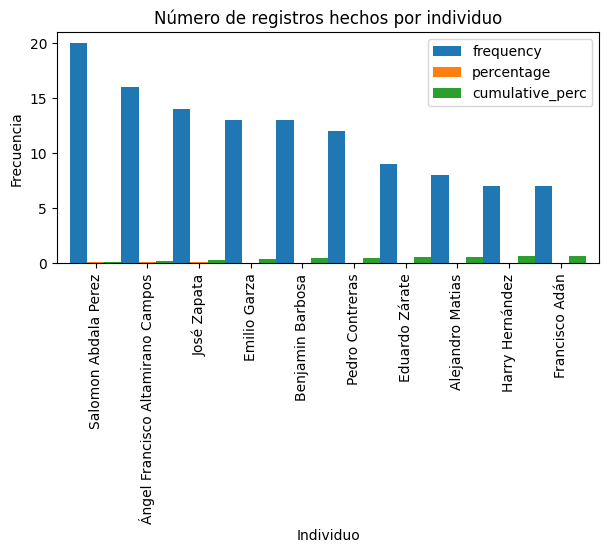

In [31]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('Número de registros hechos por individuo')
plt.xlabel('Individuo')
plt.ylabel('Frecuencia')

In [170]:
#Obtengo un análisis univariado de una variable categórica
tabla_2 = freq_tbl(Micro_Retailer['228_store_name'])
tabla_2

,228_store_name,frequency,percentage,cumulative_perc
0,Eugene’s Compostura,1,0.005848,0.005848
1,Todo Marravillas,1,0.005848,0.011696
2,Vinos y Licores Lucy,1,0.005848,0.017544
3,Casa de los dulces,1,0.005848,0.023392
4,Alondra,1,0.005848,0.029240
...,...,...,...,...
166,Barra de café,1,0.005848,0.976608
167,NumismáticaJr,1,0.005848,0.982456
168,Talavera Salazar,1,0.005848,0.988304
169,Axolote,1,0.005848,0.994152


In [172]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_2[tabla_2['frequency']>1]
Filtro

,228_store_name,frequency,percentage,cumulative_perc


In [173]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('228_store_name')
Filtro_index

,frequency,percentage,cumulative_perc
228_store_name,,,


<Axes: ylabel='frequency'>

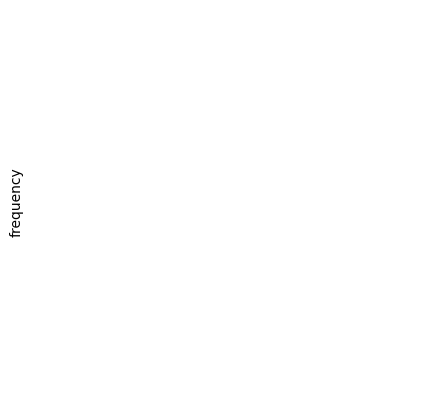

In [174]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')

In [179]:
#Obtengo un análisis univariado de una variable categórica
tabla_3 = freq_tbl(Micro_Retailer['232_type_of_store'])
tabla_3

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


In [182]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_3[tabla_3['frequency']>1]
Filtro

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


In [183]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('232_type_of_store')
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


Text(0, 0.5, 'Frecuencia')

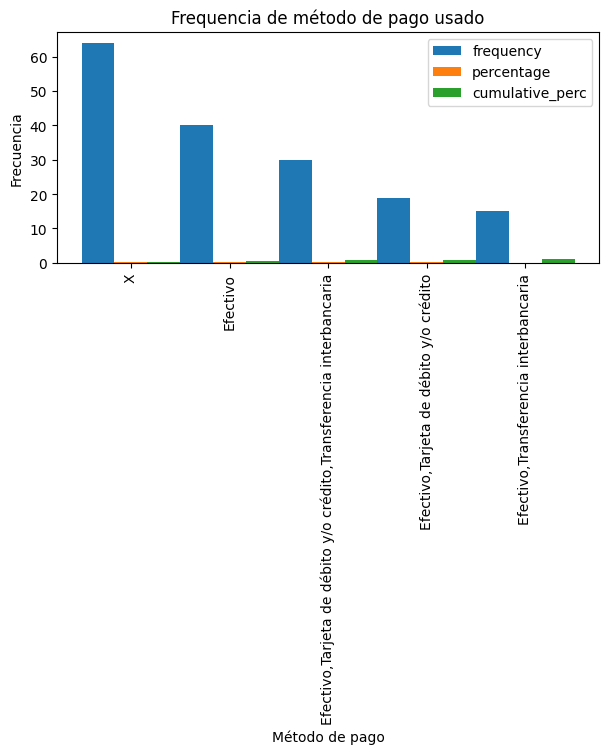

In [246]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('Frequencia de método de pago usado')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')

In [184]:
#Obtengo un análisis univariado de una variable categórica
tabla_4 = freq_tbl(Micro_Retailer['214_customer_relationship_tools'])
tabla_4

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,X,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216
6,Teléfono,1,0.005848,0.959064
7,"Cuaderno,Redes sociales",1,0.005848,0.964912
8,"Aplicación móvil,De frente",1,0.005848,0.970760
9,Físico,1,0.005848,0.976608


In [248]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_4[tabla_4['frequency']>1]
Filtro

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,X,76,0.444444,0.444444
1,Redes sociales,27,0.157895,0.602339
2,Aplicación móvil,21,0.122807,0.725146
3,Ninguna,20,0.116959,0.842105
4,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
5,Cuaderno,6,0.035088,0.953216


In [249]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('214_customer_relationship_tools')
Filtro_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
X,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


<Axes: xlabel='214_customer_relationship_tools'>

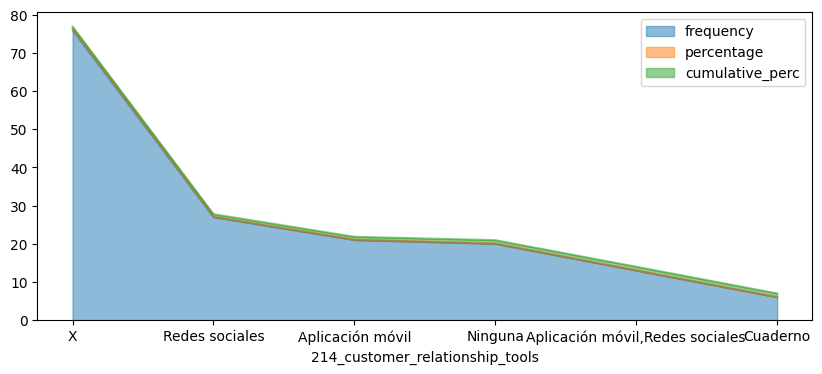

In [250]:
#Realizamos gráfico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha=0.5)

In [251]:
#Obtengo un análisis univariado de una variable categórica
tabla_5 = freq_tbl(Micro_Retailer['184_store_devices'])
tabla_5

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,52,0.304094,0.304094
1,Analog cash register,16,0.093567,0.397661
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.450292
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.502924
4,"Analog cash register,Smartphone",8,0.046784,0.549708
5,"Security cameras,Smartphone",7,0.040936,0.590643
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.619883
7,Security cameras,5,0.029240,0.649123
8,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.672515
9,"Analog cash register,Security cameras",4,0.023392,0.695906


In [252]:
#ajusto el índice de mi dataframe
Filtro_index = tabla_5.set_index('184_store_devices')
Filtro_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123
"POS system (i.e. computer + bar code scanner + printer),Security cameras,Smartphone",4,0.023392,0.672515


<Axes: ylabel='frequency'>

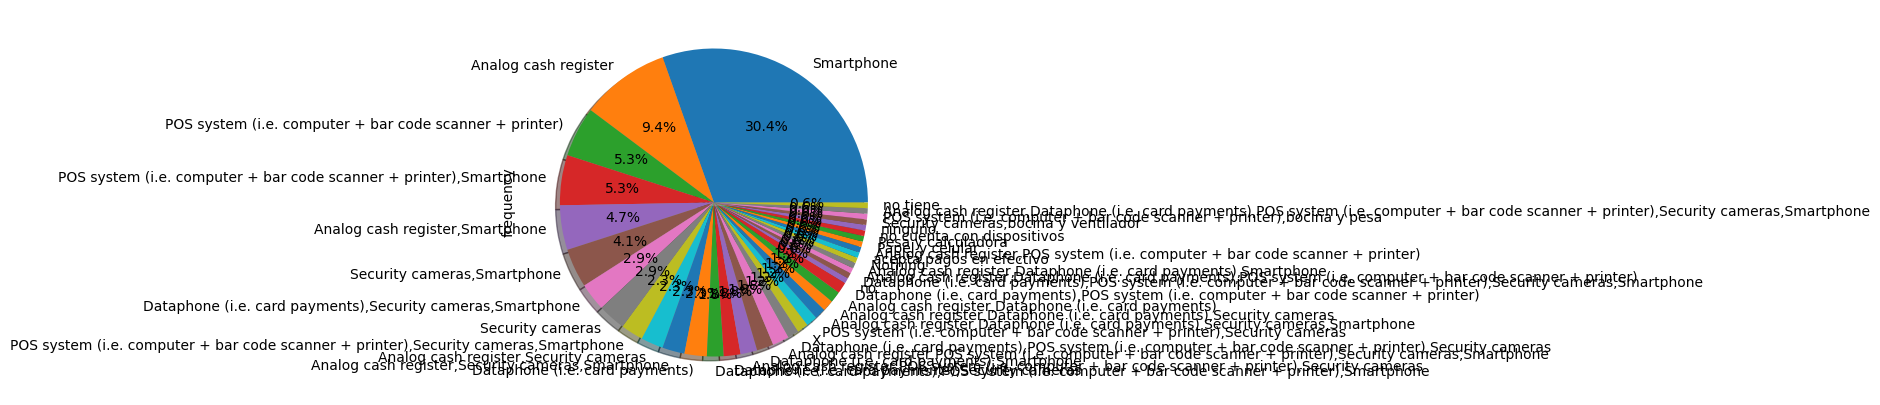

In [253]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')

In [254]:
#Obtengo un análisis univariado de una variable categórica
tabla_6 = freq_tbl(Micro_Retailer['hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz'])
tabla_6

,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,frequency,percentage,cumulative_perc
0,yes,113,0.660819,0.660819
1,no,58,0.339181,1.000000


In [255]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_6[tabla_6['frequency']>3]
Filtro

,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,frequency,percentage,cumulative_perc
0,yes,113,0.660819,0.660819
1,no,58,0.339181,1.000000


In [256]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz')
Filtro_index

,frequency,percentage,cumulative_perc
hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,,,
yes,113,0.660819,0.660819
no,58,0.339181,1.000000


<Axes: xlabel='hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz'>

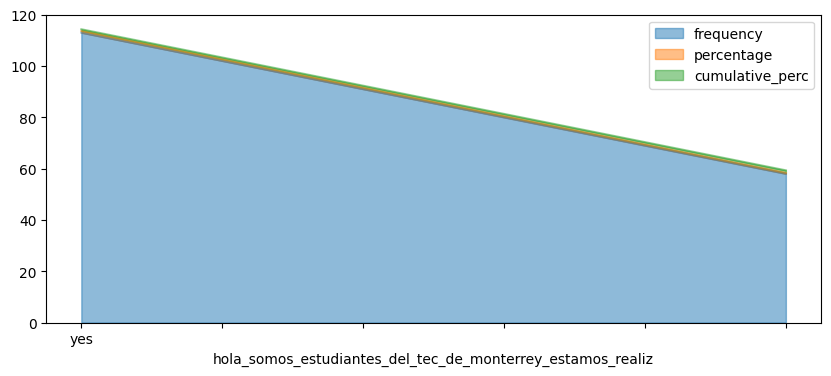

In [257]:
#Realizamos gráfico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha=0.5)

In [259]:
#Obtengo un análisis univariado de una variable categórica
tabla_7 = freq_tbl(Micro_Retailer['33_credit_to_customers'])
tabla_7

,33_credit_to_customers,frequency,percentage,cumulative_perc
0,no,80,0.467836,0.467836
1,X,64,0.374269,0.842105
2,yes,27,0.157895,1.000000


In [261]:
#ajusto el índice de mi dataframe
Filtro_index = tabla_7.set_index('33_credit_to_customers')
Filtro_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,80,0.467836,0.467836
X,64,0.374269,0.842105
yes,27,0.157895,1.000000


Text(0, 0.5, 'Frecuencia')

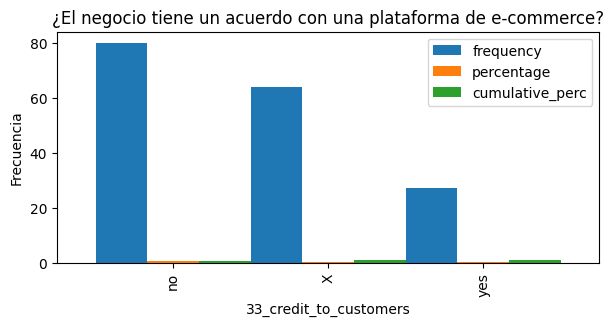

In [262]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('¿El negocio tiene un acuerdo con una plataforma de e-commerce?')
plt.ylabel('Frecuencia')

In [263]:
#Obtengo un análisis univariado de una variable categórica
tabla_8 = freq_tbl(Micro_Retailer['193_sales_planning_tools'])
tabla_8

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,X,89,0.520468,0.520468
1,Ninguna,33,0.192982,0.713450
2,Cuaderno,21,0.122807,0.836257
3,Software especializado,6,0.035088,0.871345
4,Excel,6,0.035088,0.906433
5,"Cuaderno,Excel",3,0.017544,0.923977
6,"Cuaderno,Ninguna",2,0.011696,0.935673
7,Other,1,0.005848,0.941520
8,Mental,1,0.005848,0.947368
9,Por temporada de pan,1,0.005848,0.953216


In [264]:
#ajusto el índice de mi dataframe
Filtro_index = tabla_8.set_index('193_sales_planning_tools')
Filtro_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
X,89,0.520468,0.520468
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433
"Cuaderno,Excel",3,0.017544,0.923977
"Cuaderno,Ninguna",2,0.011696,0.935673
Other,1,0.005848,0.941520
Mental,1,0.005848,0.947368


<Axes: ylabel='frequency'>

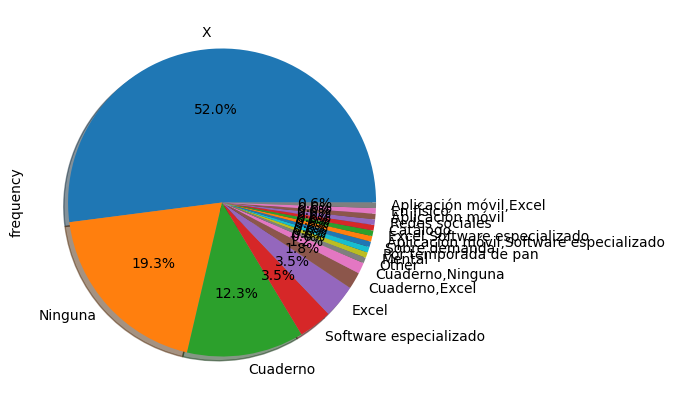

In [265]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')

In [267]:
#Obtengo un análisis univariado de una variable categórica
tabla_9 = freq_tbl(Micro_Retailer['261_technology_organization'])
tabla_9

,261_technology_organization,frequency,percentage,cumulative_perc
0,X,102,0.596491,0.596491
1,Totalmente de acuerdo,28,0.163743,0.760234
2,De acuerdo,25,0.146199,0.906433
3,Totalmente en desacuerdo,9,0.052632,0.959064
4,Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304
5,En desacuerdo,2,0.011696,1.000000


In [269]:
#ajusto el índice de mi dataframe
Filtro_index = tabla_9.set_index('261_technology_organization')
Filtro_index

,frequency,percentage,cumulative_perc
261_technology_organization,,,
X,102,0.596491,0.596491
Totalmente de acuerdo,28,0.163743,0.760234
De acuerdo,25,0.146199,0.906433
Totalmente en desacuerdo,9,0.052632,0.959064
Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304
En desacuerdo,2,0.011696,1.000000


<Axes: xlabel='261_technology_organization'>

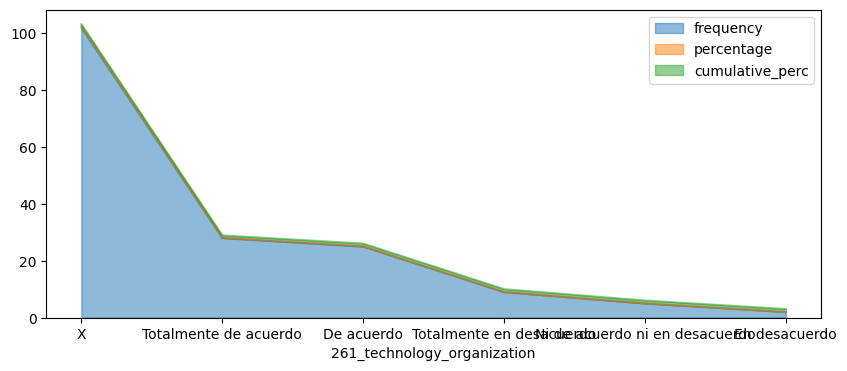

In [270]:
#Realizamos gráfico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha=0.5)

In [271]:
#Obtengo un análisis univariado de una variable categórica
tabla_10 = freq_tbl(Micro_Retailer['157_frequency_organize_shelves'])
tabla_10

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,X,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608
6,Anualmente,2,0.011696,0.988304
7,Semestralmente,1,0.005848,0.994152
8,No se tiene,1,0.005848,1.000000


In [272]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_10[tabla_10['frequency']>2]
Filtro

,157_frequency_organize_shelves,frequency,percentage,cumulative_perc
0,X,75,0.438596,0.438596
1,Semanalmente,40,0.233918,0.672515
2,Diariamente,32,0.187135,0.859649
3,Nunca,8,0.046784,0.906433
4,Mensualmente,7,0.040936,0.947368
5,Quincenalmente,5,0.029240,0.976608


In [273]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('157_frequency_organize_shelves')
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
X,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608


Text(0, 0.5, 'Frecuencia')

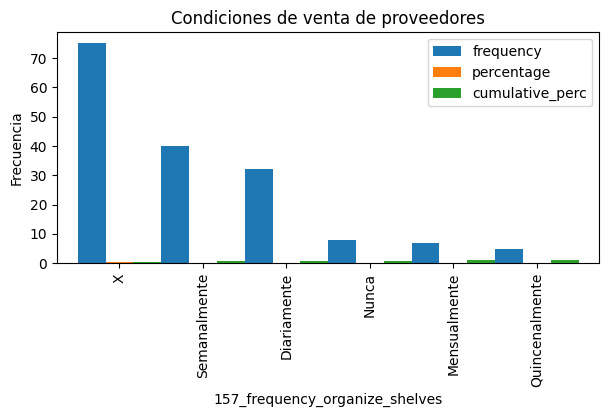

In [274]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('Condiciones de venta de proveedores')
plt.ylabel('Frecuencia')

In [275]:
#Obtengo un análisis univariado de una variable categórica
tabla_11 = freq_tbl(Micro_Retailer['249_technology_training'])
tabla_11

,249_technology_training,frequency,percentage,cumulative_perc
0,X,98,0.573099,0.573099
1,Totalmente de acuerdo,37,0.216374,0.789474
2,De acuerdo,21,0.122807,0.912281
3,Totalmente en desacuerdo,8,0.046784,0.959064
4,Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152
5,En desacuerdo,1,0.005848,1.000000


In [276]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_11[tabla_11['frequency']>2]
Filtro

,249_technology_training,frequency,percentage,cumulative_perc
0,X,98,0.573099,0.573099
1,Totalmente de acuerdo,37,0.216374,0.789474
2,De acuerdo,21,0.122807,0.912281
3,Totalmente en desacuerdo,8,0.046784,0.959064
4,Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152


In [277]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('249_technology_training')
Filtro_index

,frequency,percentage,cumulative_perc
249_technology_training,,,
X,98,0.573099,0.573099
Totalmente de acuerdo,37,0.216374,0.789474
De acuerdo,21,0.122807,0.912281
Totalmente en desacuerdo,8,0.046784,0.959064
Ni de acuerdo ni en desacuerdo,6,0.035088,0.994152


<Axes: ylabel='frequency'>

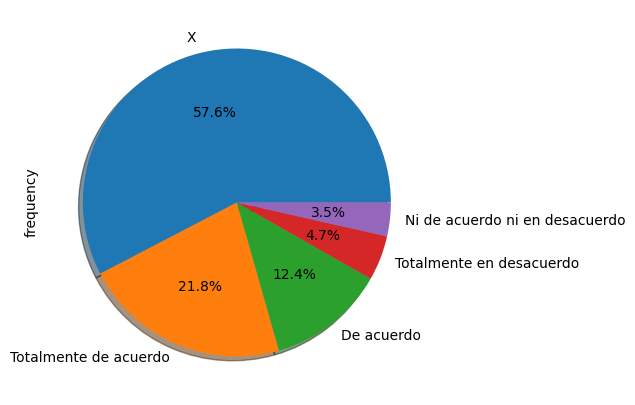

In [278]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')

In [279]:
#Obtengo un análisis univariado de una variable categórica
tabla_12 = freq_tbl(Micro_Retailer['310_burnout'])
tabla_12

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,X,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [280]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_12[tabla_12['frequency']>5]
Filtro

,310_burnout,frequency,percentage,cumulative_perc
0,no,68,0.397661,0.397661
1,X,64,0.374269,0.771930
2,yes,39,0.228070,1.000000


In [281]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('310_burnout')
Filtro_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
X,64,0.374269,0.771930
yes,39,0.228070,1.000000


<Axes: xlabel='310_burnout'>

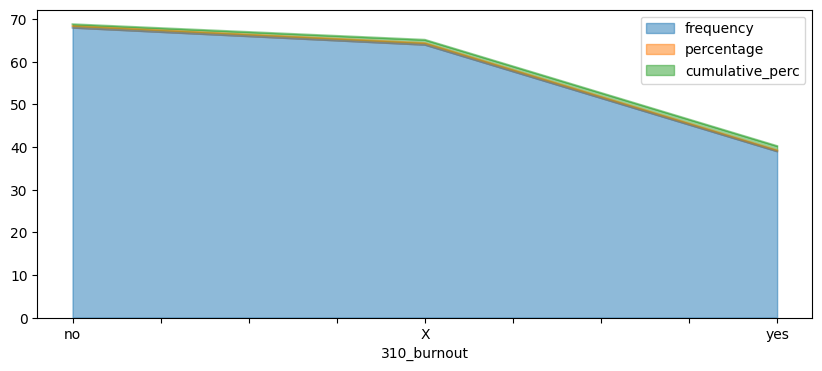

In [282]:
#Realizamos gráfico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha=0.5)

In [283]:
#Obtengo un análisis univariado de una variable categórica
tabla_13 = freq_tbl(Micro_Retailer['189_payment_methods'])
tabla_13

,189_payment_methods,frequency,percentage,cumulative_perc
0,X,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
6,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
7,Tarjeta de débito y/o crédito,1,0.005848,1.000000


In [284]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_13[tabla_13['frequency']>1]
Filtro

,189_payment_methods,frequency,percentage,cumulative_perc
0,X,64,0.374269,0.374269
1,Efectivo,40,0.233918,0.608187
2,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
3,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
4,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


In [285]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('189_payment_methods')
Filtro_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
X,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


Text(0, 0.5, 'Frecuencia')

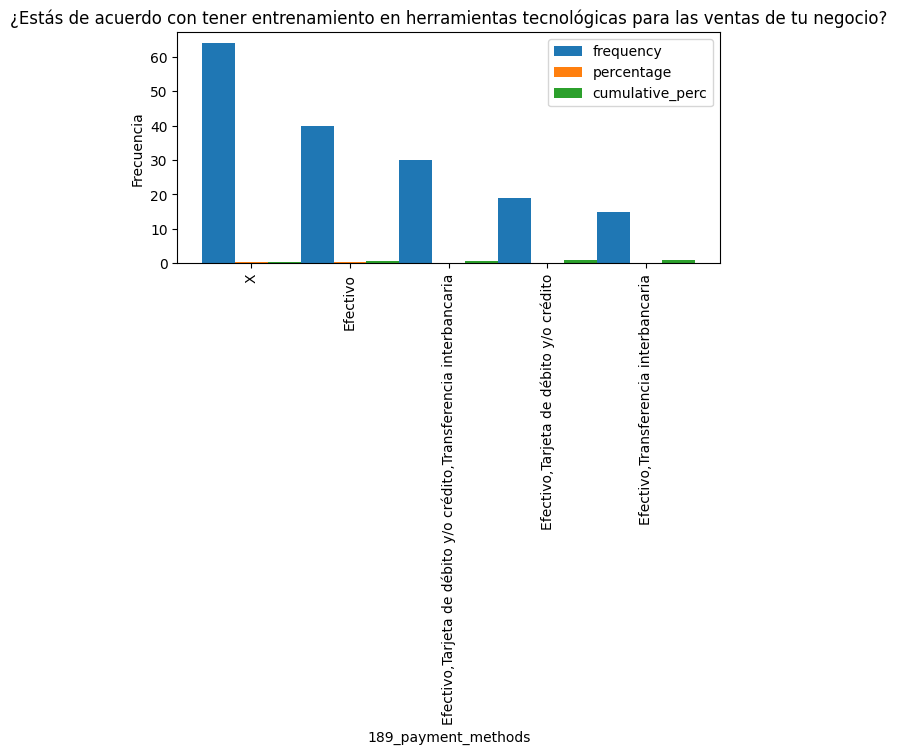

In [286]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('¿Estás de acuerdo con tener entrenamiento en herramientas tecnológicas para las ventas de tu negocio?')
plt.ylabel('Frecuencia')

In [290]:
#Obtengo un análisis univariado de una variable categórica
tabla_14 = freq_tbl(Micro_Retailer['43_willingness_share_sales_data_suppliers'])
tabla_14

KeyError: ignored

In [291]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_14[tabla_14['frequency']>2]
Filtro

,43_willingness_share_sales_data_suppliers,frequency,percentage,cumulative_perc
0,X,101,0.590643,0.590643
1,Totalmente en desacuerdo,53,0.309942,0.900585
2,Algo de acuerdo,7,0.040936,0.941520
3,Algo en desacuerdo,5,0.029240,0.970760
4,Totalmente de acuerdo,3,0.017544,0.988304


In [292]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('43_willingness_share_sales_data_suppliers')
Filtro_index

,frequency,percentage,cumulative_perc
43_willingness_share_sales_data_suppliers,,,
X,101,0.590643,0.590643
Totalmente en desacuerdo,53,0.309942,0.900585
Algo de acuerdo,7,0.040936,0.941520
Algo en desacuerdo,5,0.029240,0.970760
Totalmente de acuerdo,3,0.017544,0.988304


<Axes: ylabel='frequency'>

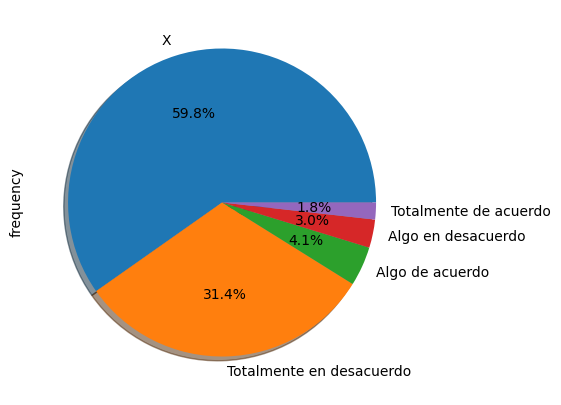

In [293]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')

In [298]:
#Obtengo un análisis univariado de una variable categórica
tabla_15 = freq_tbl(Micro_Retailer['261_technology_organization'])
tabla_15

,261_technology_organization,frequency,percentage,cumulative_perc
0,X,102,0.596491,0.596491
1,Totalmente de acuerdo,28,0.163743,0.760234
2,De acuerdo,25,0.146199,0.906433
3,Totalmente en desacuerdo,9,0.052632,0.959064
4,Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304
5,En desacuerdo,2,0.011696,1.000000


In [299]:
#Obtengo un filtro de los valores más relevanes de la variable categórica seleccionada
Filtro = tabla_15[tabla_15['frequency']>2]
Filtro

,261_technology_organization,frequency,percentage,cumulative_perc
0,X,102,0.596491,0.596491
1,Totalmente de acuerdo,28,0.163743,0.760234
2,De acuerdo,25,0.146199,0.906433
3,Totalmente en desacuerdo,9,0.052632,0.959064
4,Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304


In [300]:
#ajusto el índice de mi dataframe
Filtro_index = Filtro.set_index('261_technology_organization')
Filtro_index

,frequency,percentage,cumulative_perc
261_technology_organization,,,
X,102,0.596491,0.596491
Totalmente de acuerdo,28,0.163743,0.760234
De acuerdo,25,0.146199,0.906433
Totalmente en desacuerdo,9,0.052632,0.959064
Ni de acuerdo ni en desacuerdo,5,0.029240,0.988304


Text(0, 0.5, 'Frecuencia')

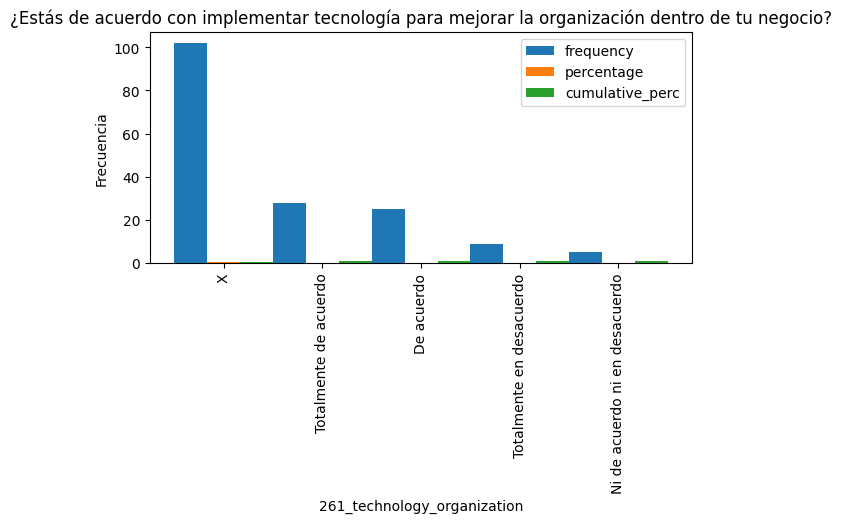

In [301]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index.plot(kind='bar', width=1, figsize=(7,3))
plt.title('¿Estás de acuerdo con implementar tecnología para mejorar la organización dentro de tu negocio?')
plt.ylabel('Frecuencia')

In [307]:
#Convertirmos la columna en string para poder sacar su tabla de frecuencia
Micro_Retailer['172_supplier_frequency'] = Micro_Retailer['172_supplier_frequency'].astype(str)

In [311]:
#Obtengo un análisis univariado de una variable categórica
tabla_16 = freq_tbl(Micro_Retailer['172_supplier_frequency'])
tabla_16

,172_supplier_frequency,frequency,percentage,cumulative_perc
0,1.0,60,0.350877,0.350877
1,2.0,44,0.257310,0.608187
2,7.0,38,0.222222,0.830409
3,3.1,10,0.058480,0.888889
4,5.0,9,0.052632,0.941520
5,3.0,6,0.035088,0.976608
6,4.0,4,0.023392,1.000000


In [312]:
#ajusto el índice de mi dataframe
Filtro_index = tabla_16.set_index('172_supplier_frequency')
Filtro_index

,frequency,percentage,cumulative_perc
172_supplier_frequency,,,
1.0,60,0.350877,0.350877
2.0,44,0.257310,0.608187
7.0,38,0.222222,0.830409
3.1,10,0.058480,0.888889
5.0,9,0.052632,0.941520
3.0,6,0.035088,0.976608
4.0,4,0.023392,1.000000


<Axes: ylabel='frequency'>

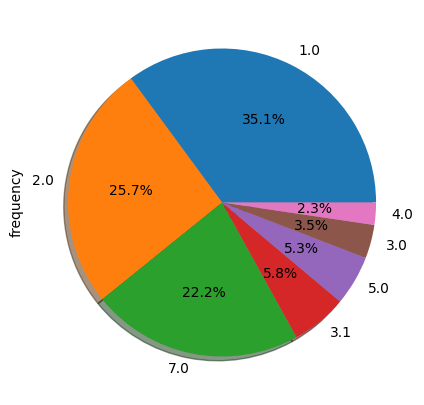

In [313]:
#Realizamos gráfico de barras del daaframe filtrado
Filtro_index['frequency'].plot(kind='pie', figsize=(10,5), shadow=True, autopct='%0.1f%%')